# Selection and Analysis of neutrino-Ar CCQE scattering with a single proton production 

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/slides/meetings/UsersMeetingApril17/Figures'
figures_size = (8,4)
figures_fontsize = 15
markers_size = 6

## GENIE features of the data-sample 

In [3]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'total CC1p',(100*float(len(GENIECC1p))/len(GENIECC1p)),'%'

12976 total CC1p 100.0 %


In [4]:
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'in active volume',(100*float(len(GENIECC1pIsVertexContained))/len(GENIECC1p)),'%'
GENIECC1pIsMuonReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsMuonReconstructed==True]
print len(GENIECC1pIsMuonReconstructed),'muon-track reconstructed',(100*float(len(GENIECC1pIsMuonReconstructed))/len(GENIECC1p)),'%'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'tracks reconstructed',(100*float(len(GENIECC1pIsVertexReconstructed))/len(GENIECC1p)),'%'
# GENIECC1p_in_close_proximity = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['distance']<11]
# print len(GENIECC1p_in_close_proximity),'tracks with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_close_proximity))/len(GENIECC1p)),'%'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
# print len(GENIECC1p_in_FV),'tracks reconstructed and contained',(100*float(len(GENIECC1p_in_FV))/len(GENIECC1p)),'%'
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(GENIECC1p)),'%'

6365 in active volume 49.0520961776 %
4873 muon-track reconstructed 37.553945746 %
1167 tracks reconstructed 8.99352651048 %
757 tracks reconstructed and contained with a separation distance below 11 cm 5.83384710234 %


### The CC1p pairs as a function of Ev

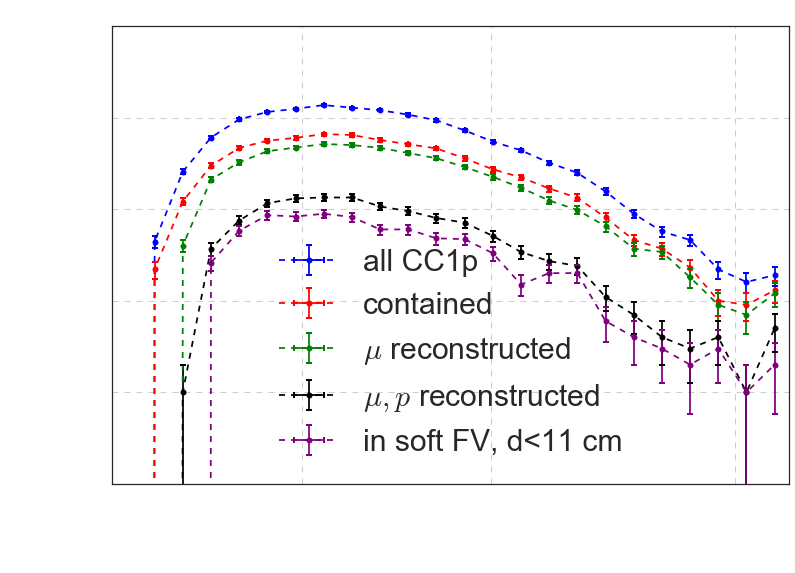

In [5]:
GENIEsamples = [GENIECC1p ,GENIECC1pIsVertexContained, GENIECC1pIsMuonReconstructed, GENIECC1pIsVertexReconstructed, GENIECC1p_in_FV_close_proximity]
GENIElabels = ['all CC1p', 'contained' , '$\\mu$ reconstructed' , '$\\mu,p$ reconstructed' , 'in soft FV, d<11 cm']
GENIEcolors = ['blue' , 'red', 'green' , 'black' , 'purple']
fig,ax = plt.subplots(figsize=(12,8))#figures_size)
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(GENIEsamples,GENIElabels,GENIEcolors):
    h,bins,_=plt.hist(sample.truth_Ev,bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=markers_size, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=30)
ax.grid(linestyle='--',alpha=1.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',ticks_color='white',fontsize=35)
plt.tight_layout()
ax.xaxis.set_ticks([0,0.7,1.4,2.3])
ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_yscale('log')
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/CCQEProcessesWithProtons/Figures/CC1pContributionInTheSampleEvBinned.pdf')

# 2-tracks clusters

In [6]:
MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')
MCBNBextBNB_in_FV = sample_in_FV(MCBNBextBNB)
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'
print len(MCBNBextBNB_in_FV),'2-tracks clusters from MC-BNB events + extBNB in FV'

39881 2-tracks clusters from MC-BNB events + extBNB
25827 2-tracks clusters from MC-BNB events + extBNB in FV


In [7]:
MCBNBextBNB = MCBNBextBNB_in_FV
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'

TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==True]
print len(TrueCC1p), 'are true (GENIE) cc1p, ',float(100*float(len(TrueCC1p))/len(MCBNBextBNB)),'%'

CC1pDetected = MCBNBextBNB[MCBNBextBNB.Is1mu1p==True]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p',float(100*float(len(CC1pDetected))/len(MCBNBextBNB)),'%'

NonCC1p = MCBNBextBNB[(MCBNBextBNB.Non1mu1p==True) & (MCBNBextBNB.pdg_long!=-9999) & (MCBNBextBNB.pdg_short!=-9999) ]
print len(NonCC1p), 'are 2-tracks not 1µ1p',float(100*float(len(NonCC1p))/len(MCBNBextBNB)),'%'

extPairs = MCBNBextBNB[(MCBNBextBNB.pdg_long==-9999) | (MCBNBextBNB.pdg_short==-9999)]
print len(extPairs), 'are 2-tracks with unrecognized pdg code (extBNB)',float(100*float(len(extPairs))/len(MCBNBextBNB)),'%'

print len(TrueCC1p) + len(CC1pDetected) + len(NonCC1p) + len(extPairs)

samples = [TrueCC1p , CC1pDetected, NonCC1p , extPairs]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' , 'cosmic data' ]
cmaps = ['Blues' , 'Greens', 'Reds' , 'Purples']
colors = ['blue' , 'green', 'red' , 'purple']

25827 2-tracks clusters from MC-BNB events + extBNB
685 are true (GENIE) cc1p,  2.65226313548 %
2558 are 2-tracks clusters of 1µ1p 9.90436365044 %
3208 are 2-tracks not 1µ1p 12.4211096914 %
19376 are 2-tracks with unrecognized pdg code (extBNB) 75.0222635227 %
25827


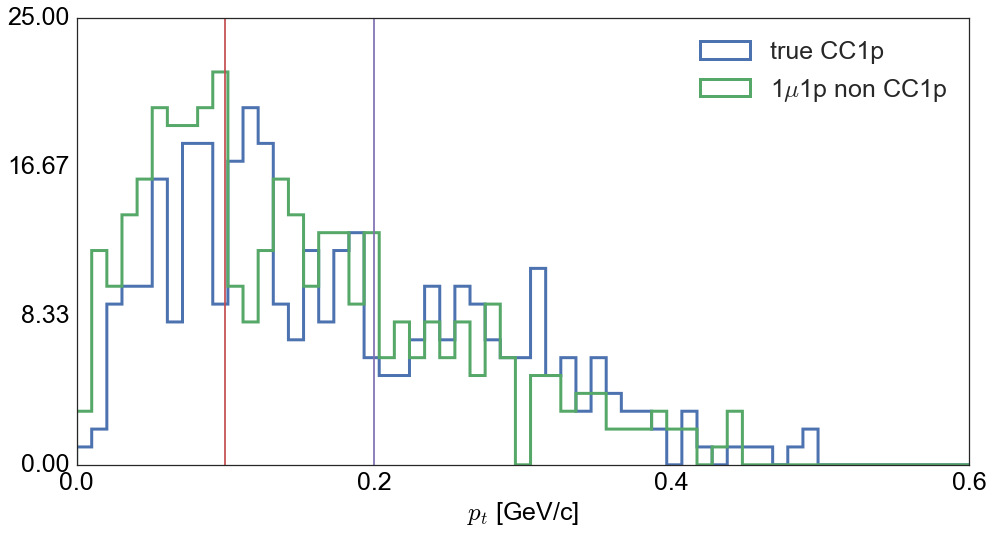

In [20]:
# sample = CC1pDetected
sample1 = reduced_samples['cut 5'][0]
sample2 = reduced_samples['cut 5'][1]

fig,ax=plt.subplots(figsize=(16,8))
plt.hist(sample2['reco_CC1p_Pt'],bins=np.linspace(0,0.6,60),histtype='step',linewidth=3,label=labels[0]);
plt.hist(sample1['reco_CC1p_Pt'],bins=np.linspace(0,0.6,60),histtype='step',linewidth=3,label=labels[1]);
set_axes(ax,'$p_t$ [GeV/c]')
plt.plot([0.1,0.1],ax.get_ylim())
plt.plot([0.2,0.2],ax.get_ylim())

ax.legend(fontsize=25)

In [13]:
pureff_df = pd.DataFrame(columns=['cut','$\mu-p$ pur.','$\mu-p$ eff.','CC1p pur.','CC1p eff.'])

# samples_after_cuts = [sample for sample in samples]
reduced_samples = dict()
reduced_samples['no cuts'] = [sample for sample in samples]
# cut 1 
# ------------
# cuts on PIDa
print '------------'
print 'cut 1: PIDa(µ) vs PIDa(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['no cuts'],samples,labels):
    reduced = sample
#     reduced = reduced[(((reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000))                               
#                       &(reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton'])                     
#                       &(reduced['PIDA_assigned_muon']>0))==False)]
    reduced = reduced[reduced['PIDA_assigned_proton']>8]
    reduced = reduced[reduced['PIDA_assigned_proton']>8]

    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 1'] = samples_after_cuts



# cut 2
# ------------
# lµ vs lp
print '------------'
print 'cut 2: l(µ) vs l(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 1'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['l_small_pida']>4]
    reduced=reduced[reduced['l_large_pida']<120]
    reduced=reduced[reduced['l_large_pida']>8]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 2'] = samples_after_cuts



# cut 3
# ------------
# no-collinearity: cut on angle between tracks
print '------------'
print 'cut 3: no-collinearity'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 2'],samples,labels):
    reduced = sample[np.abs(180./np.pi*sample['2_tracks_angle']-90)<60]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0),'%'
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 3'] = samples_after_cuts




# cut 4
# ------------
# Delta-Q
print '------------'
print 'cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 3'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 4'] = samples_after_cuts






# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 5: Delta-phi vs. theta_pq'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced=reduced[reduced['reco_CC1p_theta_pq_fromE']<25]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 5'] = samples_after_cuts



# # cut 6
# # ------------
# # n(miss) vs. alpha(miss)
# print '------------'
# print 'cut 6: n(miss) vs. alpha(miss)'
# samples_after_cuts,frac,number = [],[],[]
# for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 5'],samples,labels):
#     reduced=sample
#     reduced = sample[(np.abs( sample['reco_CC1p_n_miss_fromE'] - (slope*sample['reco_CC1p_alpha_miss_fromE']+intercept))<dy)    
#                      &(sample['reco_CC1p_alpha_miss_fromE']>reco_CC1p_alpha_miss_fromE_min)]
#     # reduced = reduced[np.abs( reduced['reco_CC1p_n_miss_fromE'] - (-reduced['reco_CC1p_alpha_miss_fromE']+1.05))<0.15]
#     reduced_len = float(len(reduced))
#     number.append(reduced_len)
#     frac.append(100.0 * reduced_len / len(original_sample))
#     print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
#     samples_after_cuts.append(reduced)
# print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
# reduced_samples['cut 6'] = samples_after_cuts

# cut 7
# ------------
# reasonable kinematics
print '------------'
print 'cut 7: reasonable kinematics'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 5'],samples,labels):
    reduced = sample
#     reduced = reduced[(reduced['reco_CC1p_Q2_fromE']>0)&(reduced['reco_CC1p_Q2_fromE']<1)]
    reduced = reduced[(reduced['reco_CC1p_W2_fromE']>0)&(reduced['reco_CC1p_W2_fromE']<2)]
    reduced = reduced[(reduced['reco_CC1p_Xb_fromE']>0)&(reduced['reco_CC1p_Xb_fromE']<2)]
    reduced = reduced[(reduced['reco_CC1p_omega_fromE']>0)&(reduced['reco_CC1p_omega_fromE']<1)]
    reduced = reduced[(reduced['reco_CC1p_q_fromE']>0)&(reduced['reco_CC1p_q_fromE']<1)]
    reduced = reduced[(reduced['reco_CC1p_n_miss_fromE']>0.)&(reduced['reco_CC1p_n_miss_fromE']<0.75)]
    reduced = reduced[(reduced['reco_CC1p_Pmu']>0.0)&(reduced['reco_CC1p_Pp']>0.0)]
    reduced = reduced[(reduced['reco_CC1p_Emu']>0.0)&(reduced['reco_CC1p_Emu']>0.0)]
    reduced = reduced[(reduced['reco_CC1p_theta_pq_fromE']>0.0)]
    reduced = reduced[(reduced['reco_CC1p_s_fromE']>0.0)]
    reduced = reduced[(reduced['reco_CC1p_Pmu_z']+reduced['reco_CC1p_Pp_z']>0.1)]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 7'] = samples_after_cuts

# # y vs. theta_pq
# frac,number = [],[]
# for i,sample,original_sample,label in zip(range(4),samples_after_cuts,samples,labels):
#     print len(sample)
#     reduced=sample
#     reduced=reduced[reduced['reco_CC1p_y_corrected']< 0.63 + -0.005 *np.square(reduced['reco_CC1p_theta_pq_corrected']- 1 )]
#     reduced_len = float(len(reduced))
#     number.append(reduced_len)
#     frac.append(100.0 * reduced_len / len(original_sample))
#     print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
#     samples_after_cuts[i] = reduced
# print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)


------------
cut 1: PIDa(µ) vs PIDa(p)
true CC1p retained 93.9% in this cut (643)
1$\mu$1p non CC1p retained 94.3% in this cut (2412)
non 1$\mu$1p retained 60.7% in this cut (1947)
cosmic data retained 23.9% in this cut (4628)
efficiency:93.9 , purity:6.7
mu-p eff.:94.2 , mu-p pur.:31.7
------------
cut 2: l(µ) vs l(p)
true CC1p retained 77.5% in this cut (531)
1$\mu$1p non CC1p retained 72.2% in this cut (1846)
non 1$\mu$1p retained 44.4% in this cut (1423)
cosmic data retained 14.8% in this cut (2862)
efficiency:77.5 , purity:8.0
mu-p eff.:73.3 , mu-p pur.:35.7
------------
cut 3: no-collinearity
true CC1p retained 74.7% in this cut (512)
1$\mu$1p non CC1p retained 65.8% in this cut (1682)
non 1$\mu$1p retained 26.3% in this cut (844)
cosmic data retained 2.7% in this cut (529)
efficiency:74.7 , purity:14.4 %
mu-p eff.:67.7 , mu-p pur.:61.5
------------
cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)
true CC1p retained 67.0% in this cut (459)
1$\mu$1p non CC1p retained 36.9% in thi

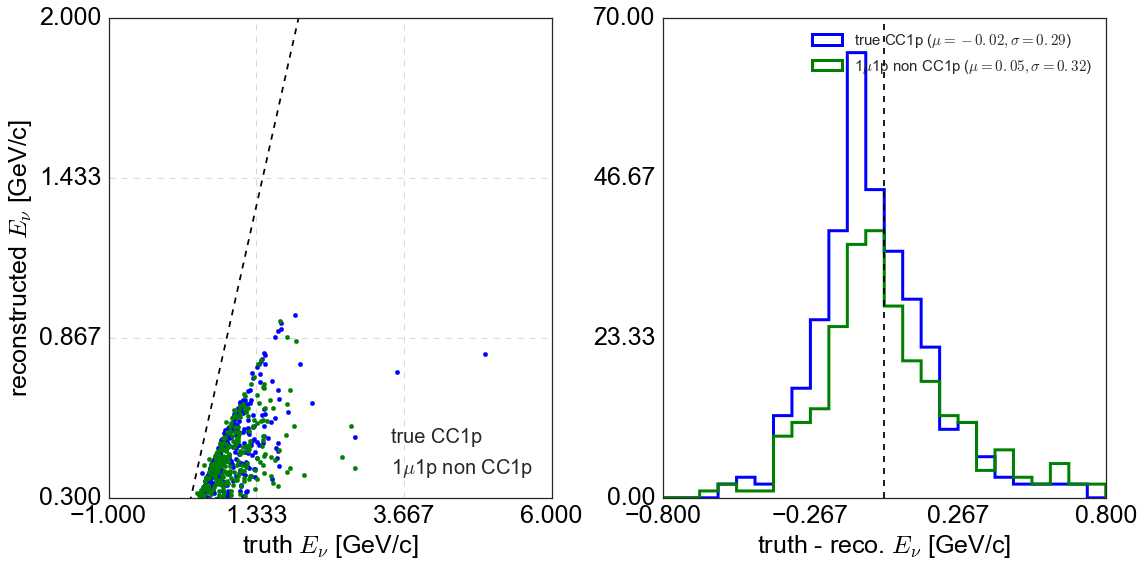

In [558]:
fig=plt.figure(figsize=(16,8))
nticklabels=4
ax=fig.add_subplot(1,2,1)
final_samples = reduced_samples['cut 6']
for i in range(2):
    plt.scatter(final_samples[i].truth_Ev,final_samples[i].reco_CC1p_Ev_fromE,color=colors[i],label=labels[i]);
plt.plot([0.2,2.],[0.2,2.],'--',color='black')
ax.legend(fontsize=20,loc='lower right')
set_axes(ax,'truth $E_{\\nu}$ [GeV/c]','reconstructed $E_{\\nu}$ [GeV/c]')
ax.set_ylim(0.3,2)
ax.xaxis.set_major_locator(LinearLocator(nticklabels));ax.yaxis.set_major_locator(LinearLocator(nticklabels))
ax.grid(linestyle='--',alpha=0.75)

ax=fig.add_subplot(1,2,2)
for i in range(2):
    x = samples_after_cuts[i].truth_Ev - samples_after_cuts[i].reco_CC1p_Ev_corrected
    plt.hist(x,color=colors[i],label=labels[i]+" ($\\mu=%.2f,\\sigma=%.2f$)"%(np.mean(x),np.std(x))
             ,bins=np.linspace(-0.8,0.8,25),histtype='step',linewidth=3);
set_axes(ax,'truth - reco. $E_{\\nu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(nticklabels));ax.yaxis.set_major_locator(LinearLocator(nticklabels))
plt.plot([0,0],ax.get_ylim(),'--',color='black')
ax.legend(fontsize=15,loc='best')
plt.tight_layout()

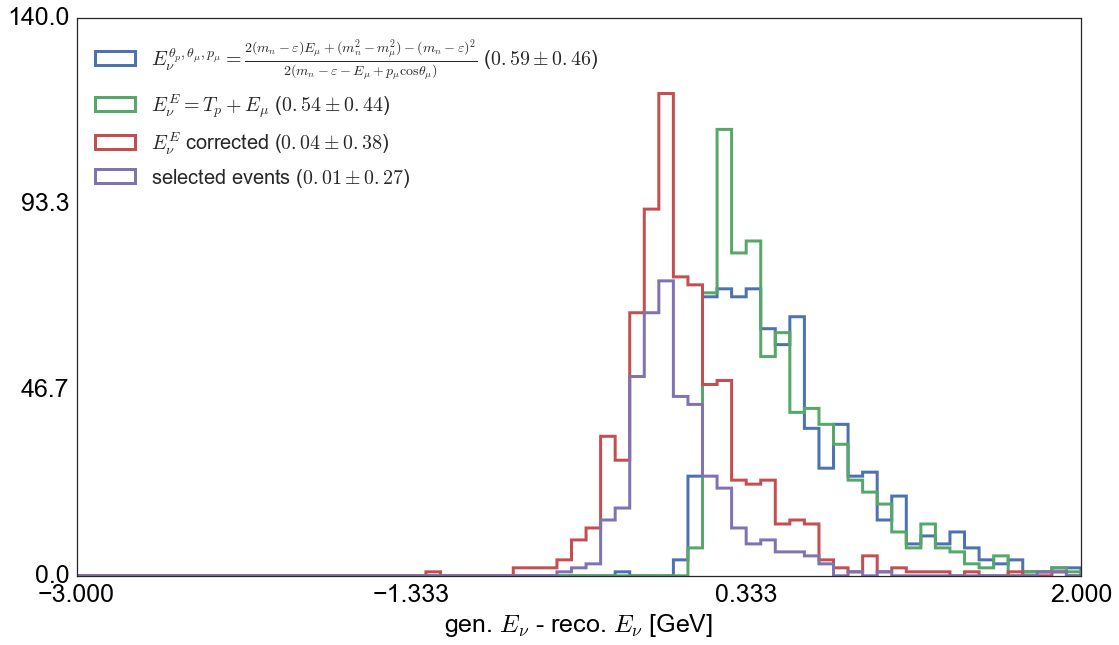

In [15]:
sample = pd.concat([samples_after_cuts[0],samples_after_cuts[1]])
reco_vars = [ 
             'reco_CC1p_Ev_with_binding'
             ,'reco_CC1p_Ev_fromE'
             ,'reco_CC1p_Ev_corrected'
            ]
reco_labels = [
               '$E_{\\nu}^{\\theta_p,\\theta_{\\mu},p_{\\mu}}= \\frac{2(m_{n}-\\varepsilon)E_{\\mu}+(m_{n}^{2}-m_{\\mu}^{2}) -(m_{n}-\\varepsilon)^{2}}{2 (m_{n} - \\varepsilon - E_{\\mu} + p_{\\mu} \\cos \\theta_{\\mu})}$' 
               ,'$E_{\\nu}^{E}=T_{p}+E_{\\mu}$'
               ,'$E_{\\nu}^{E}$ corrected'
              ]
colors = ['black','blue','green']
bins = np.linspace(-3,2,70)
fig,ax = plt.subplots(figsize=(18,10))
histtype = 'step' 
linewidth = 3

for i_var,var,label,color in zip(range(len(reco_vars)),reco_vars,reco_labels,colors):
    x = GENIECC1p_in_FV_close_proximity['truth_Ev'] - GENIECC1p_in_FV_close_proximity[var]
    h,bins,_=plt.hist( x , label=label+' ($%.2f\\pm%.2f$)'%(np.mean(x),np.std(x)), bins=bins, histtype=histtype, linewidth=linewidth,co)        
#     if i_plot==i_var:             
#         plt.text(np.mean(x) - (4*np.std(x) if i_plot>0 else 0.05*np.std(x)),np.max(h)+2,'$mean=%.2f$ GeV'%(np.mean(x)),fontsize=20)
#         plt.text(np.mean(x) - (3.5*np.std(x) if i_plot>0 else 0.15*np.std(x)),np.max(h)-5,'$\\sigma=%.2f$ GeV'%(np.std(x)),fontsize=20)
x = sample['truth_Ev'] - sample[var]
plt.hist( x , label='selected events ($%.2f\\pm%.2f$)'%(np.mean(x),np.std(x)), bins=bins, histtype=histtype, linewidth=linewidth, color=color);
set_axes(ax,'gen. $E_{\\nu}$ - reco. $E_{\\nu}$ [GeV]')
ax.legend(loc='upper left',fontsize=20)   

# Enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

In [8]:
def plot_feature_2tracks_clusters(samples=None,
                                  var='l_long',
                                  x_label='$l_{long}$ [cm]',mul=1,
                                  bins=np.linspace(0,300,100),fontsize=figures_fontsize,
                                  fig=None,do_add_legend=False,figsize=figures_size,legend_fontsize=25,
                                  Nh=2,Nw=2,i=None,ticks_color='white'):
    if i is not None and fig is not None:
        ax = fig.add_subplot(Nh,Nw,i)
    else:
        fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    for sample,label in zip(samples,labels):
        h,bins,_=plt.hist(mul*sample[var],normed=1,label=label,bins=bins,histtype='step',linewidth=3)
        if np.max(h)>max_h:
            max_h=np.max(h)
    if do_add_legend:
        ax.legend(fontsize=legend_fontsize)
    set_axes(ax,x_label=x_label,fontsize=fontsize,ticks_color=ticks_color)
    ax.set_xlim(np.min(bins),np.max(bins))
    ax.set_ylim(0,1.05*max_h)
    ax.grid(linestyle='--',alpha=0.75)
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.tight_layout()

def plot_feature_2tracks_clusters_2d(samples=None,plottype='hist',
                                  varx='l_long', vary='l_short',
                                  x_label='$l_{long}$ [cm]',y_label='$l_{short}$ [cm]',mulx=1,muly=1,
                                  bins=50,fontsize=figures_fontsize,
                                  fig=None,do_add_legend=False,figsize=figures_size,ticks_color='white'):
    
    if plottype=='hist': fig = plt.figure(figsize=figsize)
    elif plottype=='scatter': fig,ax = plt.subplots(figsize=figsize)
        
    for i,sample,label,cmap,color in zip(range(len(samples)),samples,labels,cmaps,colors):
        if len(sample)<1: continue
        
        if plottype=='hist': 
            ax=fig.add_subplot(2,2,i+1)
            plot_2d_hist(mulx*sample[varx],muly*sample[vary],bins=bins,ax=ax,cmap=cmap,ticks_color=ticks_color)
            ax.set_title(label,y=1.02,fontsize=fontsize)
            set_axes(ax,x_label=x_label if i==2 or i==3 else '',y_label=y_label if i==0 or i==2 else '',fontsize=fontsize)
            ax.grid(linestyle='--',alpha=0.75)
            ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))

            
        elif plottype=='scatter': 
            ax.scatter(mulx*sample[varx],muly*sample[vary],color=color)

    if plottype=='scatter':
        ax.set_title(label,y=1.02,fontsize=fontsize)        
        set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color='white')        
        ax.grid(linestyle='--',alpha=0.75)        
        ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    plt.tight_layout()

In [9]:
def get_fraction_in_cut( data=None , cut_var='distance', mul=1 , xmin=0.1, xmax=10 , Nbins=10 ,  cut_type= 'max' ):
    x_array = np.linspace(xmin,xmax,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for x in x_array:
        if cut_type is 'max':
            reduced = data[mul*data[cut_var]<x]
        elif cut_type is 'min':
            reduced = data[mul*data[cut_var]>x]
        numerator = float(len(reduced))
         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(x_array), np.array(frac) , np.array(frac_err)


def get_fraction_in_symmetriccut( data=None , cut_var='delta_phi', mul=1,xcenter=0.1, delta_x_min=0, delta_x_max=100 , Nbins=10 ):
    delta_x_array = np.linspace(delta_x_min,delta_x_max,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for delta_x in delta_x_array:
        reduced = data[np.abs(mul*data[cut_var]-xcenter)<delta_x]
        numerator = float(len(reduced))         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(delta_x_array), np.array(frac) , np.array(frac_err)


def plot_cut_samples (samples=samples,
                      cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=figures_size,fontsize=35,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, ax=None,ticks_color='white'):
    do_return_fig = False
    if ax is None:
        do_return_fig = True
        fig,ax=plt.subplots(figsize=figsize)    
    for sample,label in zip(samples,labels):
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_eff = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_eff = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_eff , fmt='o' , markersize=markers_size , label=label)
    if do_add_legend:
        ax.legend(fontsize=figures_fontsize,loc='best')
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color=ticks_color)
    ax.grid(linestyle='--',alpha=0.75)
    plt.tight_layout()
#     if do_return_fig: return fig

## detection cuts

### PIDa 

In [10]:
def do_graphical_cut(xy_pts,varx='x',vary='y'):
    '''
    input: 
    xy_pts array of points in (x,y) plane
    
    return: 
    lines for the cuts
    to plot them use
    for line in lines: plt.plot(line[0],line[1],'--',color='black',linewidth=1)
    '''
    # create the boundary lines
    lines = []
    for i in range(1,len(xy_pts)):
        x_array,y_array = [xy_pts[i-1][0],xy_pts[i][0]],[xy_pts[i-1][1],xy_pts[i][1]]
        lines.append([x_array,y_array])
        
        #  show the boundary lines
        slope,intercept = find_a_straight_line(x_array,y_array)  
        print 'line ',[xy_pts[i-1][0],xy_pts[i-1][1]],'=>',[xy_pts[i][0],xy_pts[i][1]]
        if varx=='x' and vary=='y':
            print "y = %f*x + %f"%(slope,intercept)
        else:
            print "reduced=reduced[reduced['%s']=%f*reduced['%s']+(%f)]"%(vary,slope,varx,intercept)
    return lines

In [22]:
reduced_this_cut,reduced_anti_cut,frac,frac_anti=[],[],[],[]
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    # triangle
#     reduced = sample
#     reduced=reduced[reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000)]
#     reduced=reduced[reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton']+(0.000000)]
#     reduced=reduced[reduced['PIDA_assigned_muon']>=0.]

#     reduced_anti = sample
#     reduced_anti=reduced_anti[((
#                                (reduced_anti['PIDA_assigned_muon']<-2.000000*reduced_anti['PIDA_assigned_proton']+(22.000000))
#                                &(reduced_anti['PIDA_assigned_muon']<1.142857*reduced_anti['PIDA_assigned_proton']+(0.000000))
#                                &(reduced_anti['PIDA_assigned_muon']>0))==False)
#                              ]
    # box
    reduced = sample
    reduced=reduced[reduced['PIDA_assigned_muon']>1]
    reduced=reduced[reduced['PIDA_assigned_muon']<20]
    reduced=reduced[reduced['PIDA_assigned_proton']>8]
    reduced=reduced[reduced['PIDA_assigned_proton']<100]

    reduced_anti = sample
    reduced_anti=reduced_anti[((
                               (reduced_anti['PIDA_assigned_muon']>1) & (reduced_anti['PIDA_assigned_muon']<20)
                               &(reduced_anti['PIDA_assigned_proton']>8) &(reduced_anti['PIDA_assigned_proton']<100))==False)
                             ]
    f = 100.*float(len(reduced))/len(sample)
    reduced_this_cut.append(reduced)
    frac.append(f)
    print len(reduced),'in sample',i,', %.f '%(100.*float(len(reduced))/len(sample)),'%'
    f_anti = 100.*float(len(reduced_anti))/len(sample)
    reduced_anti_cut.append(reduced_anti)
    frac_anti.append(f_anti)
    print len(reduced_anti),'not in sample',i,', %.f '%(100.*float(len(reduced_anti))/len(sample)),'%'
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%'
print 'purity: %.1f'%purity,'%'
purity_anti = 100.*float(len(reduced_anti_cut[0]))/(len(reduced_anti_cut[0])+len(reduced_anti_cut[1])+len(reduced_anti_cut[2])+len(reduced_anti_cut[3]))
print 'efficiency anti-cut: %.1f'%frac_anti[0],'%'
print 'purity anti-cut: %.1f'%purity_anti,'%'

623 in sample 0 , 92  %
56 not in sample 0 , 8  %
2150 in sample 1 , 84  %
414 not in sample 1 , 16  %
1674 in sample 2 , 52  %
1534 not in sample 2 , 48  %
4354 in sample 3 , 22  %
15022 not in sample 3 , 78  %
efficiency: 91.8 %
purity: 7.1 %
efficiency anti-cut: 8.2 %
purity anti-cut: 0.3 %


line  [8.0, 2.0] => [8.0, 12.0]
reduced=reduced[reduced['PIDA_assigned_muon']=0.000000*reduced['PIDA_assigned_proton']+(12.000000)]
line  [8.0, 12.0] => [35.0, 12.0]
reduced=reduced[reduced['PIDA_assigned_muon']=0.000000*reduced['PIDA_assigned_proton']+(12.000000)]
line  [35.0, 12.0] => [35.0, 2.0]
reduced=reduced[reduced['PIDA_assigned_muon']=0.000000*reduced['PIDA_assigned_proton']+(2.000000)]
line  [35.0, 2.0] => [8.0, 2.0]
reduced=reduced[reduced['PIDA_assigned_muon']=-0.000000*reduced['PIDA_assigned_proton']+(2.000000)]


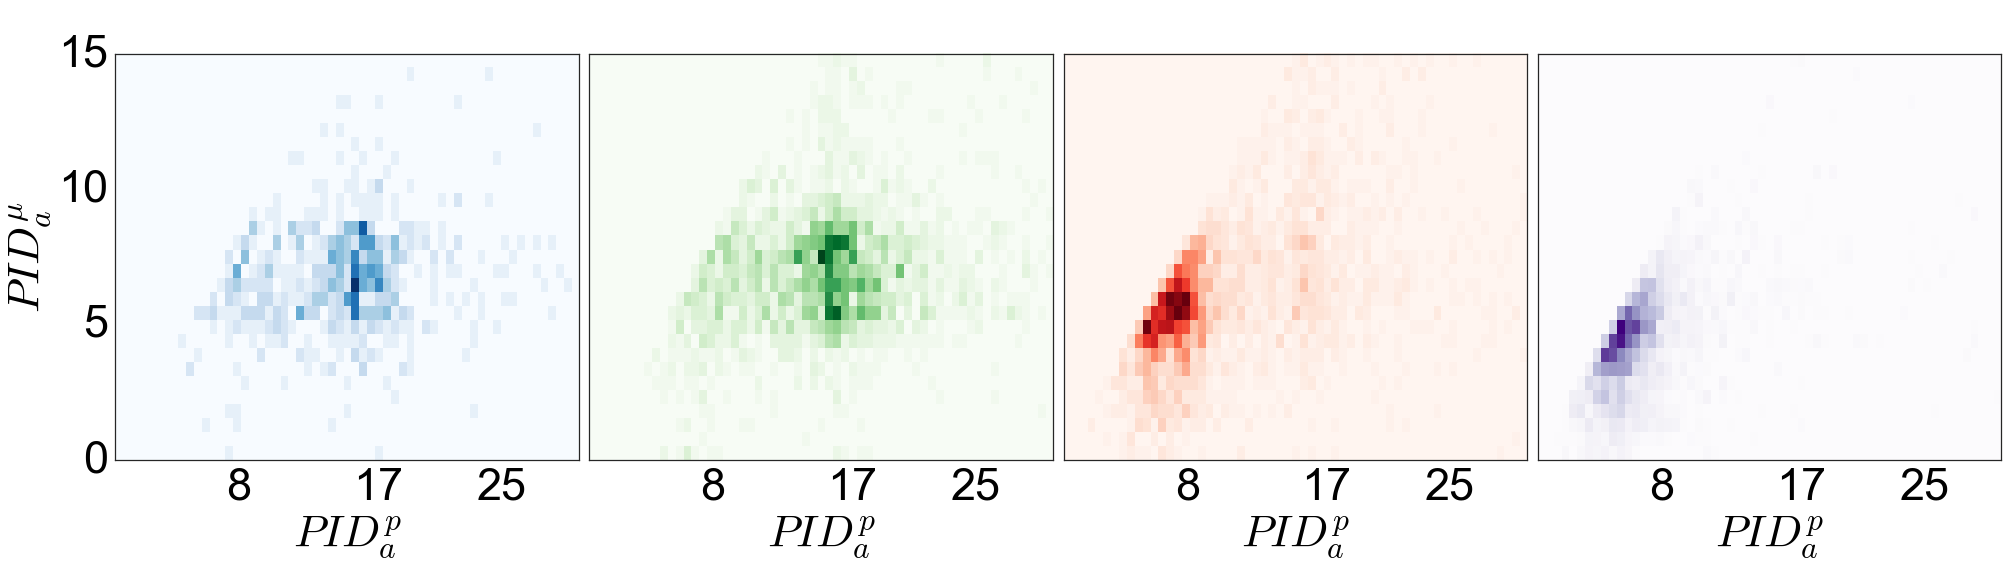

In [11]:
# lines_graphical_cut = do_graphical_cut(xy_pts = [[11.,0.],
#                                                  [7.,8.],
#                                                  [0.,0.], 
#                                                  [11.,0.],
#                                                 ],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')

lines_graphical_cut = do_graphical_cut(xy_pts = [[8.,2.],
                                                 [8.,12.],
                                                 [35.,12.], 
                                                 [35.,2.], 
                                                 [8.,2.],
                                                ],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')


fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,60),np.linspace(0,15,30))
x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    plot_2d_hist(sample['PIDA_assigned_proton'], sample['PIDA_assigned_muon'], ax=ax,fontsize=figures_fontsize,ticks_color='white',bins=bins,cmap=cmap,norm='')            

#     for i_line,line in enumerate(lines_graphical_cut):
#         plt.plot(line[0],line[1],'--',color='black',linewidth=1)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([8,17,25])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/PIDa_mu_p.pdf')

# # after applied cuts
# fig = plt.figure(figsize=(28,8))
# bins=(np.linspace(0,30,60),np.linspace(0,15,30))
# x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
# for i,sample,label,cmap,color in zip(range(3),reduced_samples['cut 5'],labels,cmaps,colors):
#     ax = fig.add_subplot(1,4,i+1)
#     ax.set_title(label,fontsize=25,y=1.02,color='white')
#     plot_2d_hist(sample['PIDA_assigned_proton'], sample['PIDA_assigned_muon'], ax=ax,fontsize=figures_fontsize,ticks_color='white',bins=bins,cmap=cmap,norm='')            

#     for i_line,line in enumerate(lines_graphical_cut):
#         plt.plot(line[0],line[1],'--',color='black',linewidth=1)
#     set_axes(ax,x_label=x_label if i>1 else '' , y_label=y_label if i==0 else '',ticks_color='white',fontsize=35)        
# plt.tight_layout()



##### length

558 in sample 0 , 81  %
1933 in sample 1 , 76  %
2171 in sample 2 , 68  %
11963 in sample 3 , 62  %


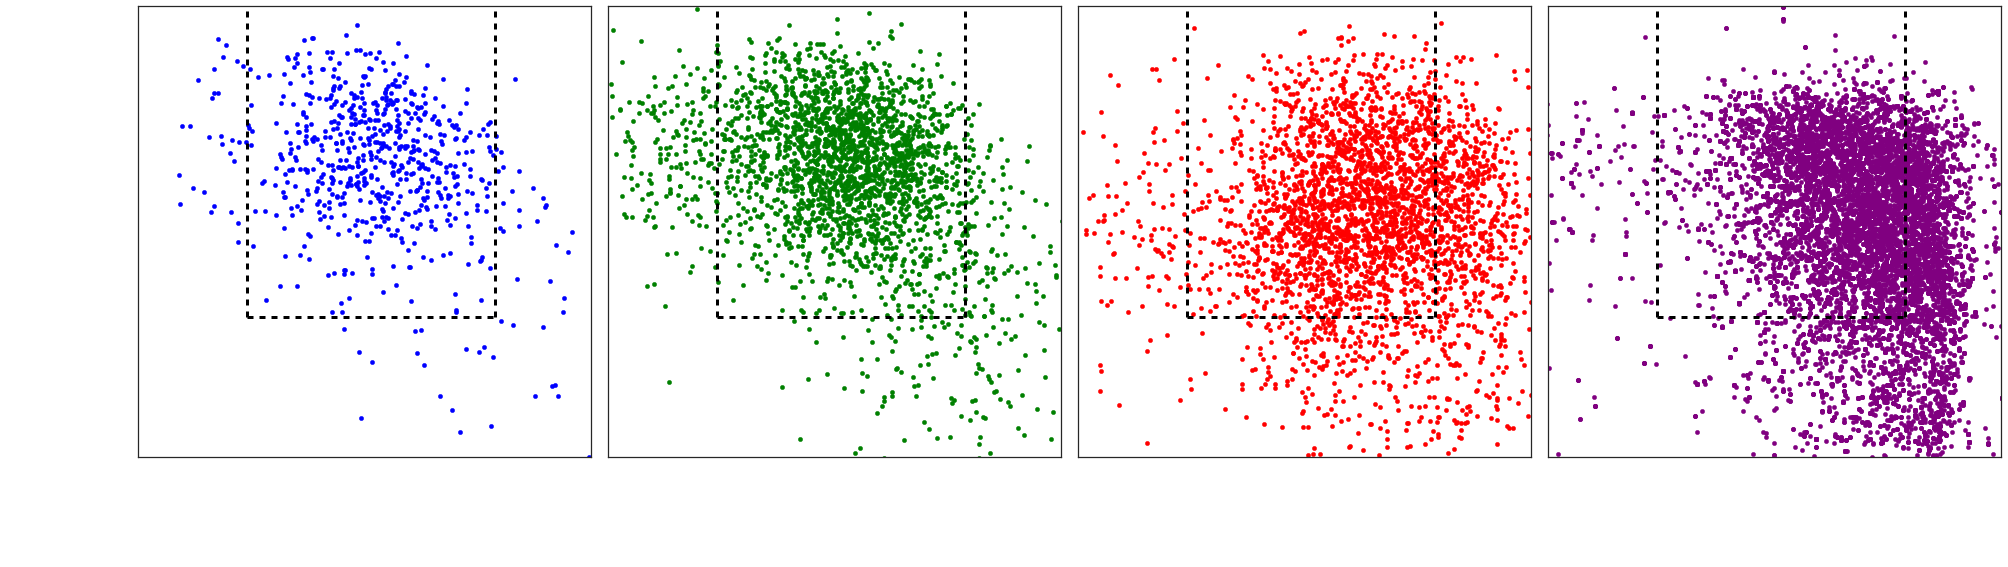

In [14]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,sample,label,cmap,color in zip(range(4),reduced_samples['no cuts'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
#     ax.set_title(label,fontsize=35,y=1.02,color='white')
    #     plot_2d_hist(sample['l_large_pida'], sample['l_small_pida'], ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap,norm='log')        
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'--',color='black',linewidth=3)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='white',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/l_mu_p.pdf')

#### Delta Q

reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
374 in sample 0 , 100  %
347 in sample 1 , 100  %
48 in sample 2 , 100  %
1 in sample 3 , 100  %


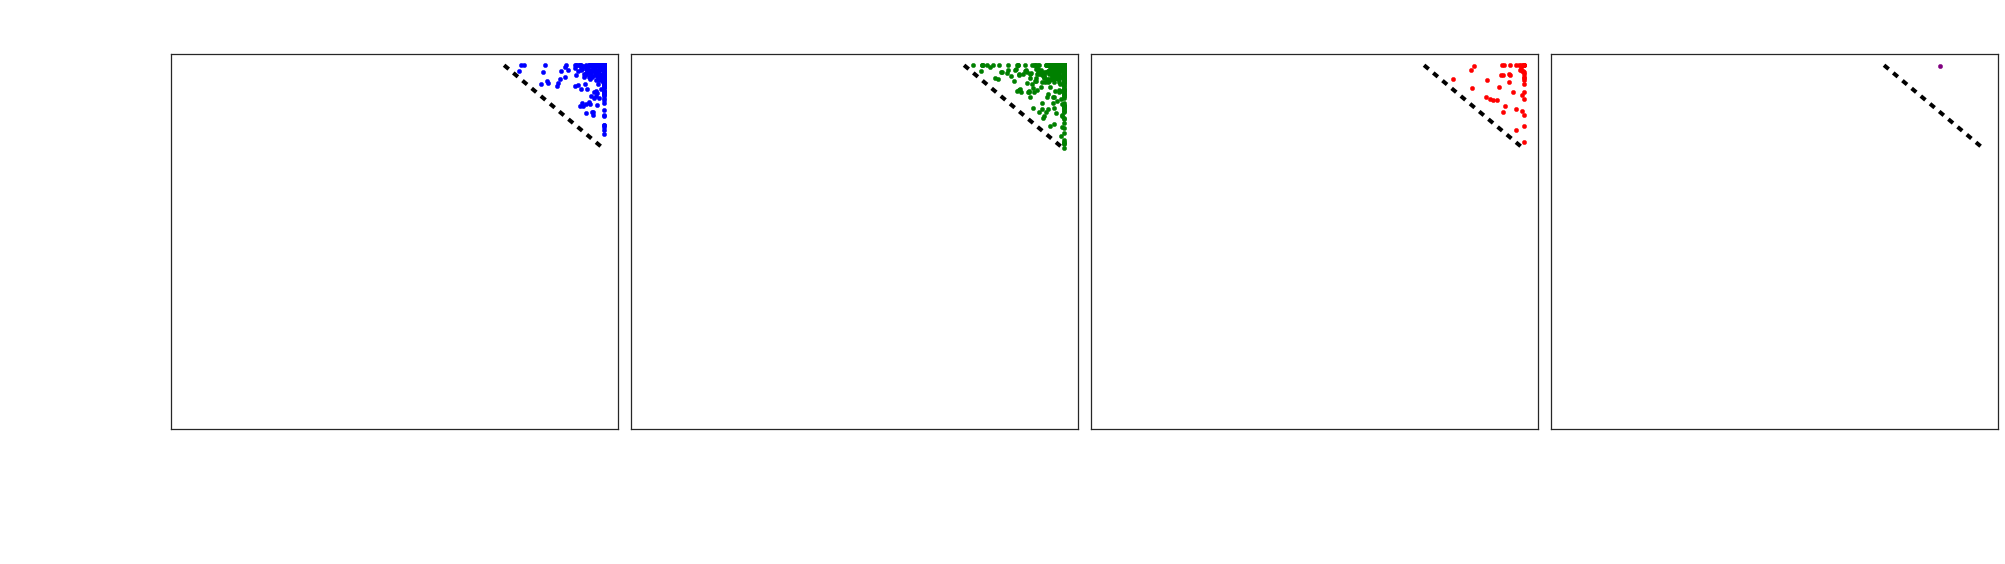

In [908]:
reduced_this_cut,frac=[],[]
x_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_u$'
y_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_v$'
varx , vary = 'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u','ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v'
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color,original_sample in zip(range(len(samples)),reduced_samples['cut 5'],labels,cmaps,colors,samples):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    #     plot_2d_hist(sample[varx],
    #                  sample[vary],ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)
    ax.scatter(sample[varx], sample[vary],color=color)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='white',fontsize=45)    
    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    x_array,y_array=[0.5,1.],[1.,0.5]
    slope,intercept = find_a_straight_line(x_array,y_array)
    plt.plot(x_array,y_array,'--',color='black',linewidth=4)
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    if i==0:     print "reduced=reduced[reduced['%s']>%f*reduced['%s']+%f]"%(vary,slope,varx,intercept)
    red = sample
    red=red[red[vary]>slope*red[varx]+intercept]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
plt.tight_layout()

### no collinearity

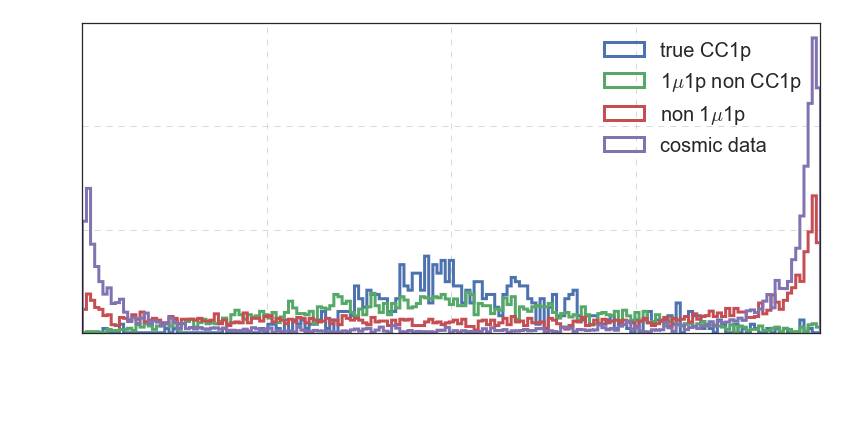

In [12]:
plot_feature_2tracks_clusters(samples=samples,var='2_tracks_angle',x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
                              ,mul=180./np.pi,bins=np.linspace(0,180,180),do_add_legend=True
                              ,figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)

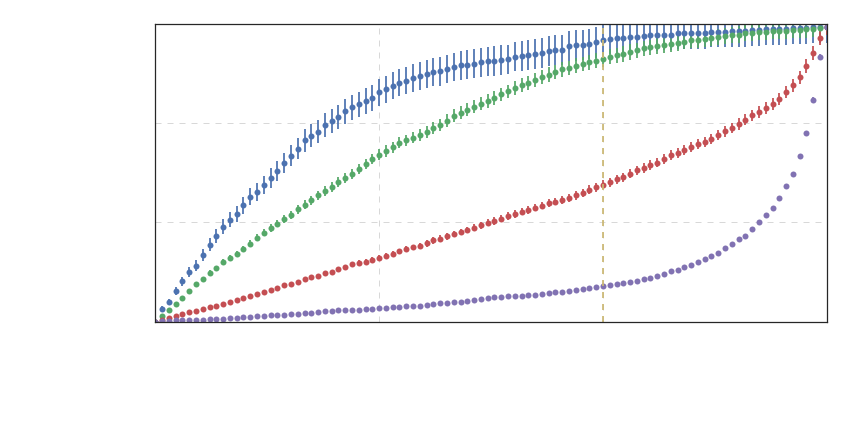

In [15]:
#reduced_samples['cut 3']
fig=plot_cut_samples(samples=reduced_samples['no cuts'],cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,ticks_color='white',
                 cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                 x_label = 'sym. cut on $\\delta \\theta_{1,2}$ around $\\pi/2$ [deg.]',
                 xcenter=90,
                 xmin=0., xmax=90 , Nbins=100)
plt.plot([60,60],[0,100],'--')

#### co-planarity

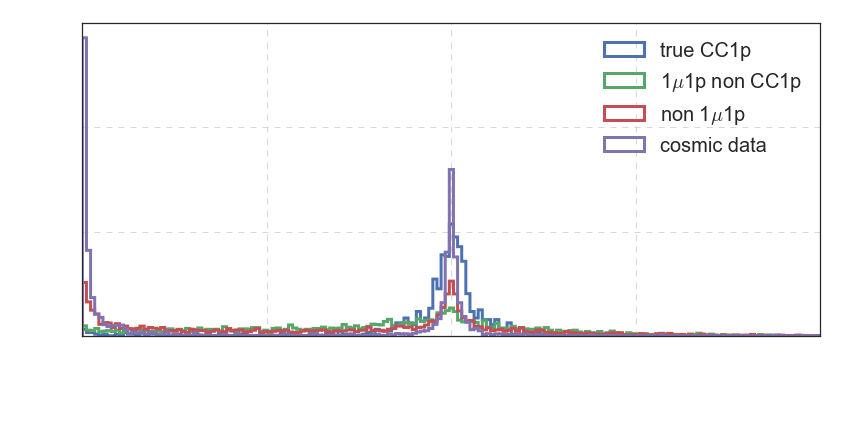

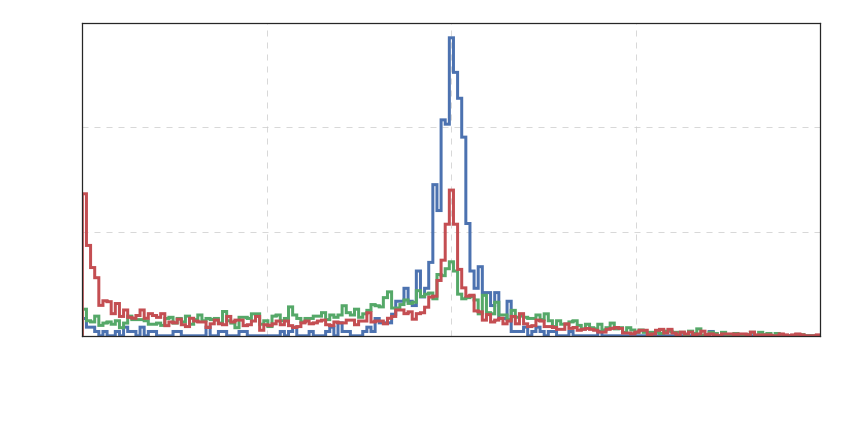

In [203]:
plot_feature_2tracks_clusters(samples=samples,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)
plot_feature_2tracks_clusters(samples=samples[0:3],var='delta_phi',x_label='$\\Delta \\phi$ [deg.]'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)

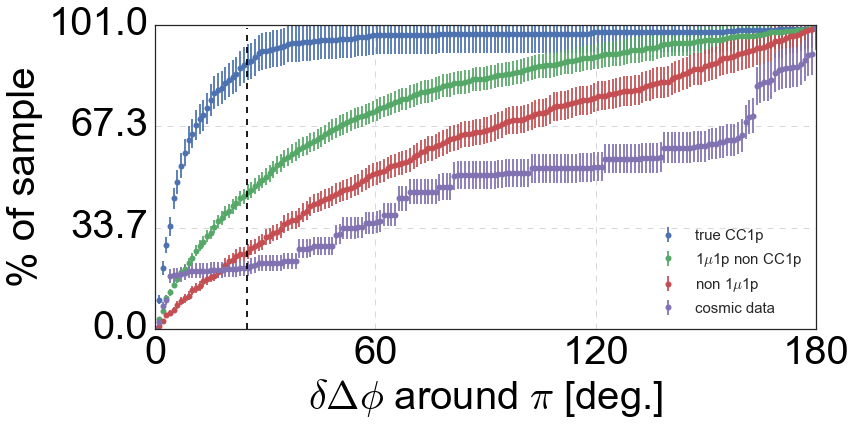

In [332]:
# fig=plot_cut_samples(cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',
#                  xcenter=180, xmin=0., xmax=180 , Nbins=180,fontsize=40,figsize=(12,6))
fig=plot_cut_samples(samples=reduced_samples['cut 4'],cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                 xcenter=180, xmin=0., xmax=180 , Nbins=180,fontsize=40,figsize=(12,6))
plt.plot([25,25],[0,100],'--',color='black')

#### \theta_pq

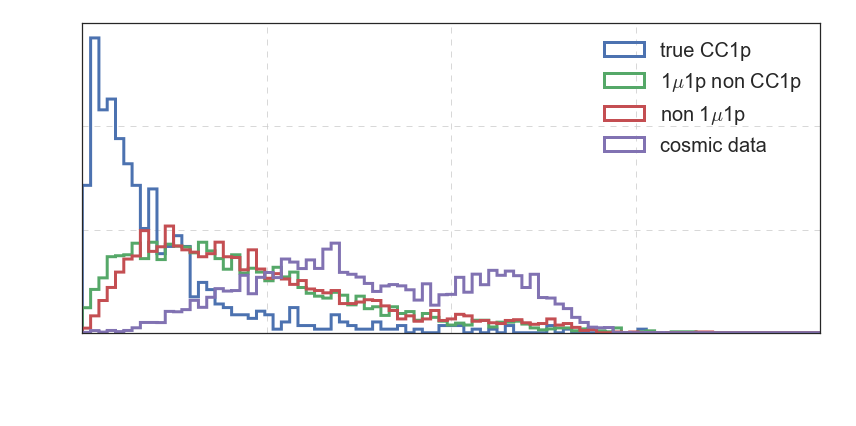

In [208]:
plot_feature_2tracks_clusters(samples=samples,var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)

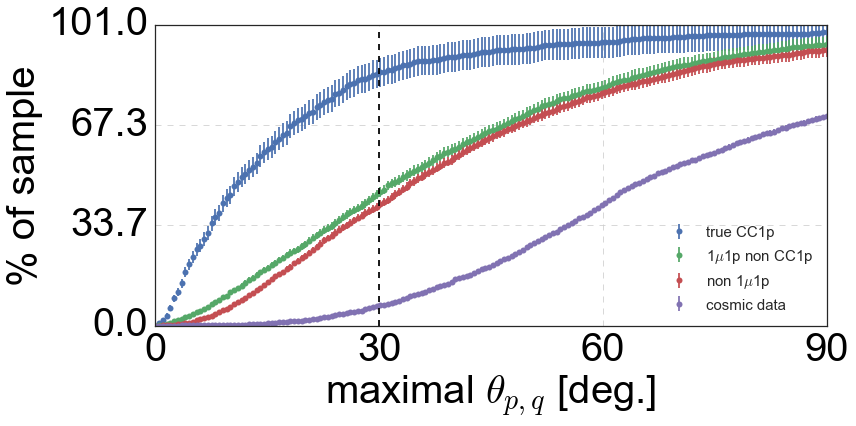

In [346]:
# fig=plot_cut_samples(samples=samples,cut_var ='reco_CC1p_theta_pq_fromE', cut_type= 'max',                 
#                  x_label = 'maximal $\\theta_{p,q}$ [deg.]', 
#                  xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,6))
plot_cut_samples(samples=reduced_samples['no cuts'],cut_var ='reco_CC1p_theta_pq_fromE', cut_type= 'max',ticks_color='black',
                 x_label = 'maximal $\\theta_{p,q}$ [deg.]', 
                 xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,6))
plt.plot([30,30],[0,100],'--',color='black')

314 in sample 0 , 84  %
233 in sample 1 , 67  %
32 in sample 2 , 67  %
1 in sample 3 , 100  %
efficiency: 84.0 %
purity: 54.1 %


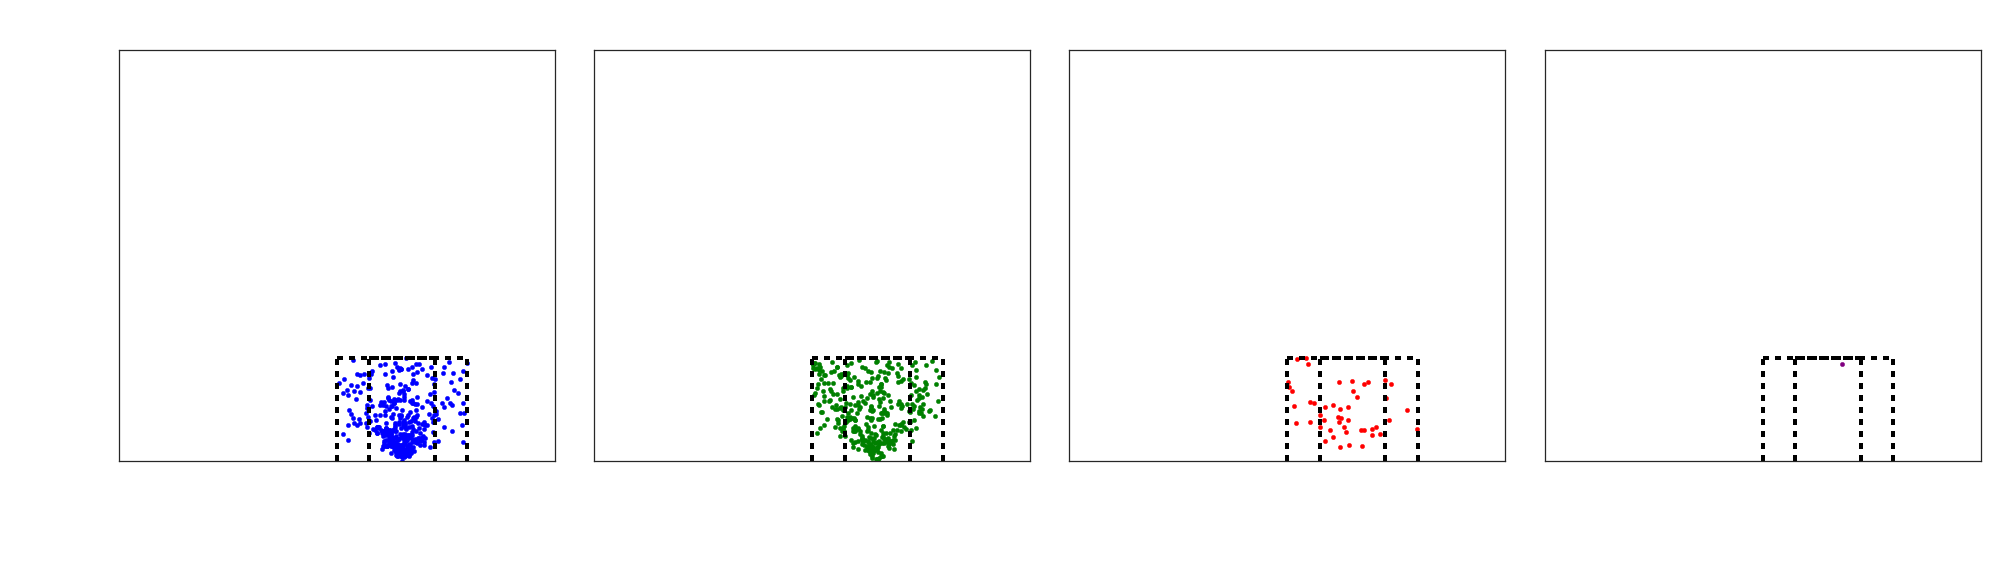

In [913]:
# theta_pq vs. \Delta \phi
# second plot - after applied cuts
reduced_this_cut,frac=[],[]
bins=(np.linspace(100,260,60),np.linspace(0,80,60))
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,original_sample,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,samples,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=40,y=1.02,color='white')
#     plot_2d_hist(sample['delta_phi'],sample['reco_CC1p_theta_pq_corrected'],ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')    
    plt.scatter(sample['delta_phi'],sample['reco_CC1p_theta_pq_fromE'],color=color)
    red = sample
    
    plt.plot([180-30,180+30],[25,25],'--',color='black',linewidth=4)
    red = red[red['reco_CC1p_theta_pq_fromE']<25]

    plt.plot([180-30,180-30],[0,25],'--',color='black',linewidth=4)
    red = red[red['delta_phi']>180-30]

    plt.plot([180+30,180+30],[0,25],'--',color='black',linewidth=4)
    red = red[red['delta_phi']<180+30]
    
    delta_phi_min , delta_phi_max , theta_pq_max = 165 , 195 , 25
    
    plt.plot([delta_phi_min , delta_phi_max],[theta_pq_max,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['reco_CC1p_theta_pq_fromE']<theta_pq_max]

    plt.plot([delta_phi_min,delta_phi_min],[0,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['delta_phi']>delta_phi_min]

    plt.plot([delta_phi_max,delta_phi_max],[0,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['delta_phi']<delta_phi_max]

    
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label='$\\Delta \\phi$ [deg.]', y_label='$\\theta_{p,q}$ [deg.]' if i==0 else '',ticks_color='white',fontsize=45)    
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    ax.xaxis.set_ticks([60,120,180,240]);ax.yaxis.set_ticks([0,25,50,75]);
    ax.set_xlim(50,250);ax.set_ylim(0,100);

plt.tight_layout()
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'

### cut 6

reduced=reduced[reduced['reco_CC1p_Xb']>3.333333*reduced['reco_CC1p_alpha_miss_fromE']+(-2.933333)]
reduced=reduced[reduced['reco_CC1p_Xb']<3.750000*reduced['reco_CC1p_alpha_miss_fromE']+(-2.362500)]
334 in sample 0 , 89  %
276 in sample 1 , 80  %
40 in sample 2 , 83  %
1 in sample 3 , 100  %
efficiency: 89.3 %
purity: 51.3 %


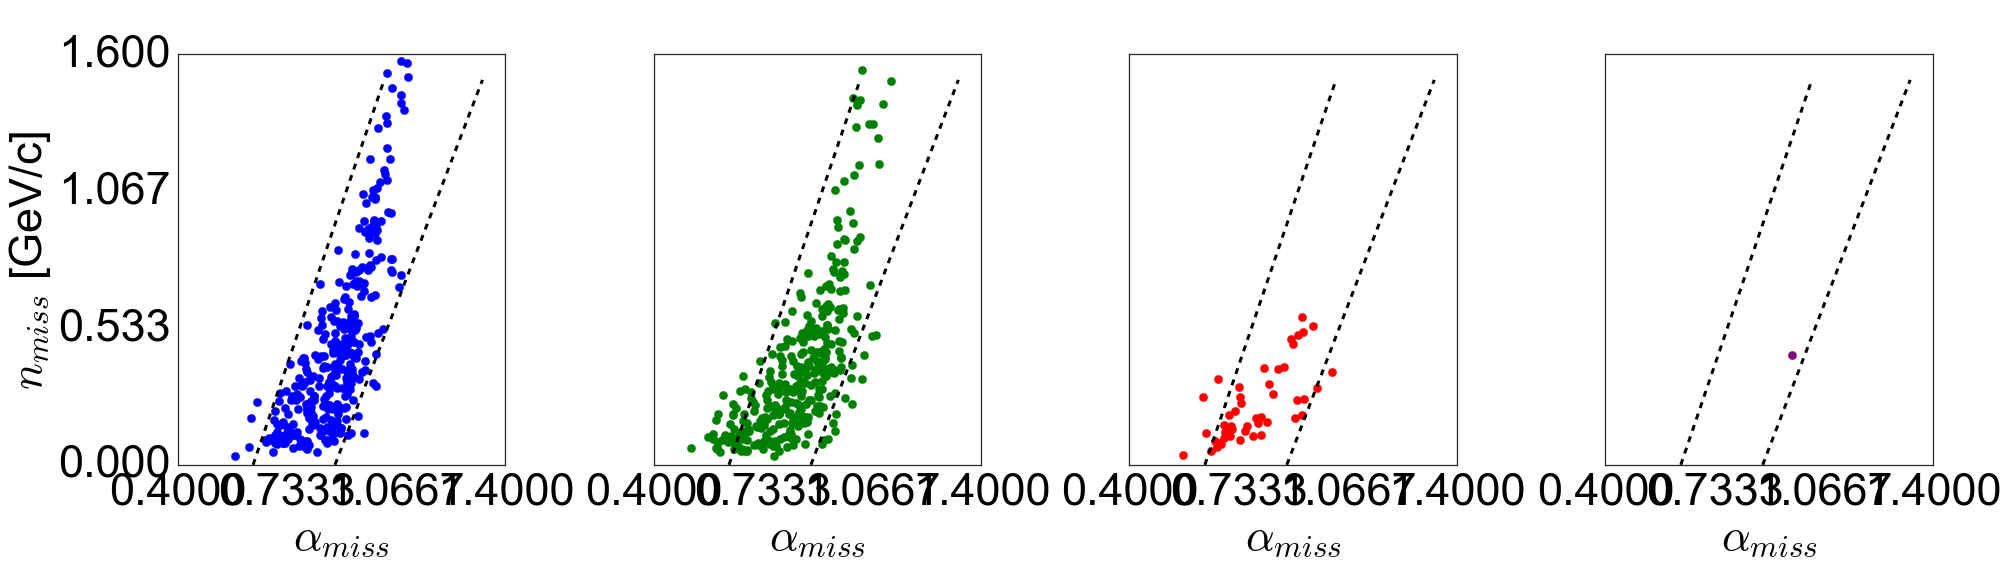

In [801]:
fig = plt.figure(figsize=(28,8))
reduced_this_cut,frac=[],[]
x_array_bottom,y_array_bottom=[0.88,1.33],[0.0,1.5]
x_array_top,y_array_top=[0.63,1.03],[0.0,1.5]

for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    ax.scatter(sample['reco_CC1p_alpha_miss_fromE'], sample['reco_CC1p_Xb'], color=color,s=70)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
#     ax.xaxis.set_ticks([0.5,0.9,1.3]);ax.yaxis.set_ticks([0,0.2,0.4,0.6]);
    ax.set_xlim(0.4,1.4);ax.set_ylim(0,1.6);
    plt.plot(x_array_bottom,y_array_bottom,'--',color='black',linewidth=3)
    plt.plot(x_array_top,y_array_top,'--',color='black',linewidth=3)
    if i==0:
        slope_bottom,intercept_bottom = find_a_straight_line(x_array_bottom,y_array_bottom)
        print "reduced=reduced[reduced['reco_CC1p_Xb']>%f*reduced['reco_CC1p_alpha_miss_fromE']+(%f)]"%(slope_bottom,intercept_bottom)
        slope_top,intercept_top = find_a_straight_line(x_array_top,y_array_top)
        print "reduced=reduced[reduced['reco_CC1p_Xb']<%f*reduced['reco_CC1p_alpha_miss_fromE']+(%f)]"%(slope_top,intercept_top)
    red = sample    
    red = red[red['reco_CC1p_Xb']>slope_bottom*red['reco_CC1p_alpha_miss_fromE']+intercept_bottom]
    red = red[red['reco_CC1p_Xb']<slope_top*red['reco_CC1p_alpha_miss_fromE']+intercept_top]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'       
plt.tight_layout()


reduced=reduced[reduced['reco_CC1p_Pt']>-4.545455*reduced['reco_CC1p_alpha_miss_fromE']+(3.409091)]
reduced=reduced[reduced['reco_CC1p_Pt']<-1.000000*reduced['reco_CC1p_alpha_miss_fromE']+(1.320000)]
353 in sample 0 , 94  %
274 in sample 1 , 79  %
33 in sample 2 , 69  %
1 in sample 3 , 100  %
efficiency: 94.4 %
purity: 53.4 %


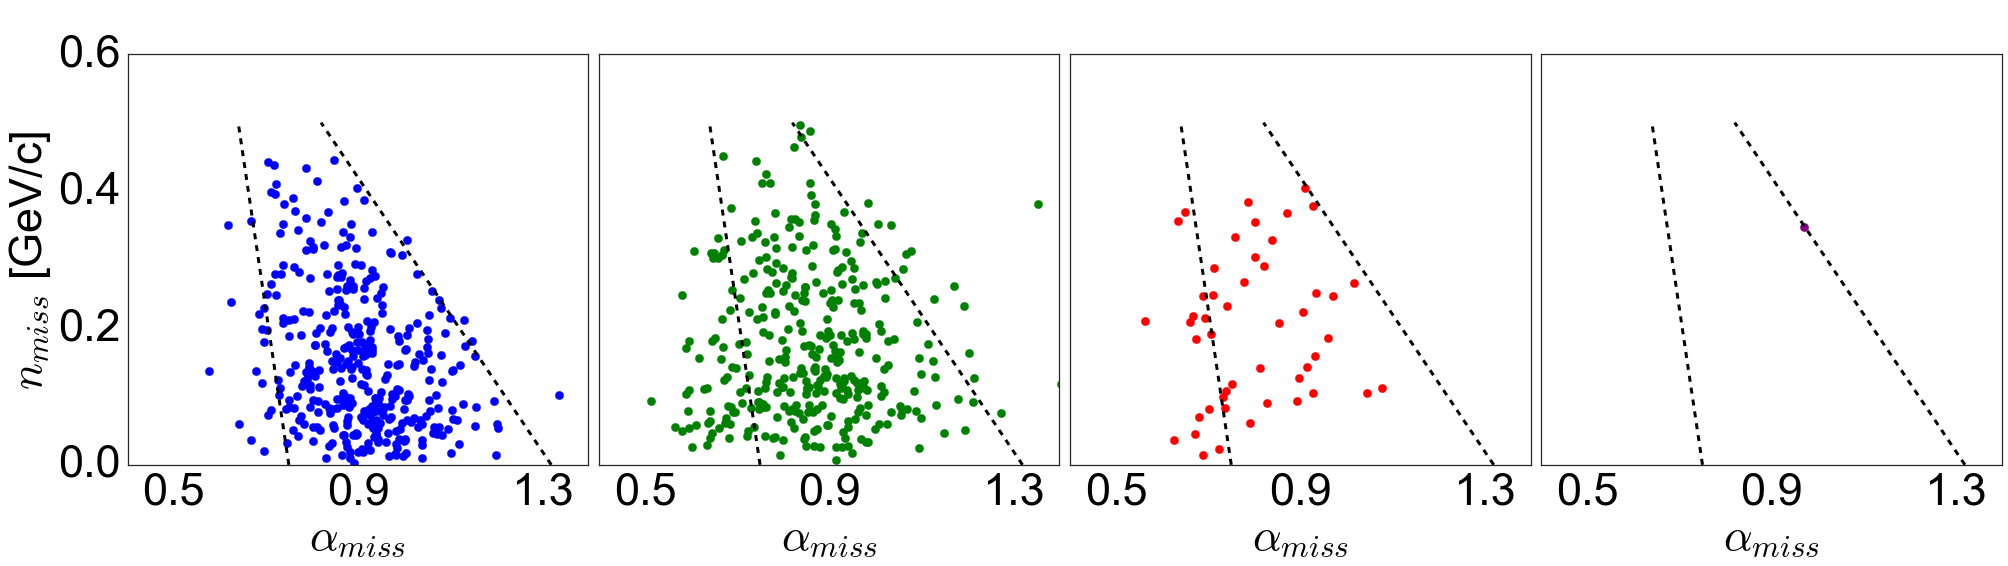

In [779]:
x_array_bottom,y_array_bottom=[0.75,0.64],[0.0,0.5]
x_array_top,y_array_top=[1.32,0.82],[0.0,0.5]


fig = plt.figure(figsize=(28,8))
reduced_this_cut,frac=[],[]

for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    ax.scatter(sample['reco_CC1p_alpha_miss_fromE'], sample['reco_CC1p_Pt'], color=color,s=70)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    ax.xaxis.set_ticks([0.5,0.9,1.3]);ax.yaxis.set_ticks([0,0.2,0.4,0.6]);
    ax.set_xlim(0.4,1.4);ax.set_ylim(0,0.6);

    plt.plot(x_array_bottom,y_array_bottom,'--',color='black',linewidth=3)
    plt.plot(x_array_top,y_array_top,'--',color='black',linewidth=3)

    if i==0:
        slope_bottom,intercept_bottom = find_a_straight_line(x_array_bottom,y_array_bottom)
        print "reduced=reduced[reduced['reco_CC1p_Pt']>%f*reduced['reco_CC1p_alpha_miss_fromE']+(%f)]"%(slope_bottom,intercept_bottom)
        slope_top,intercept_top = find_a_straight_line(x_array_top,y_array_top)
        print "reduced=reduced[reduced['reco_CC1p_Pt']<%f*reduced['reco_CC1p_alpha_miss_fromE']+(%f)]"%(slope_top,intercept_top)

        
    red = sample    
    red = red[red['reco_CC1p_Pt']>slope_bottom*red['reco_CC1p_alpha_miss_fromE']+intercept_bottom]
    red = red[red['reco_CC1p_Pt']<slope_top*red['reco_CC1p_alpha_miss_fromE']+intercept_top]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'


purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'       
plt.tight_layout()

reduced=reduced[reduced['reco_CC1p_alpha_miss_fromE']>0.000000*reduced['reco_CC1p_n_miss_fromE']+(0.700000)]
reduced=reduced[reduced['reco_CC1p_alpha_miss_fromE']<-1.333333*reduced['reco_CC1p_n_miss_fromE']+(1.476667)]
360 in sample 0 , 96  %
279 in sample 1 , 80  %
36 in sample 2 , 75  %
1 in sample 3 , 100  %
efficiency: 96.3 %
purity: 53.3 %


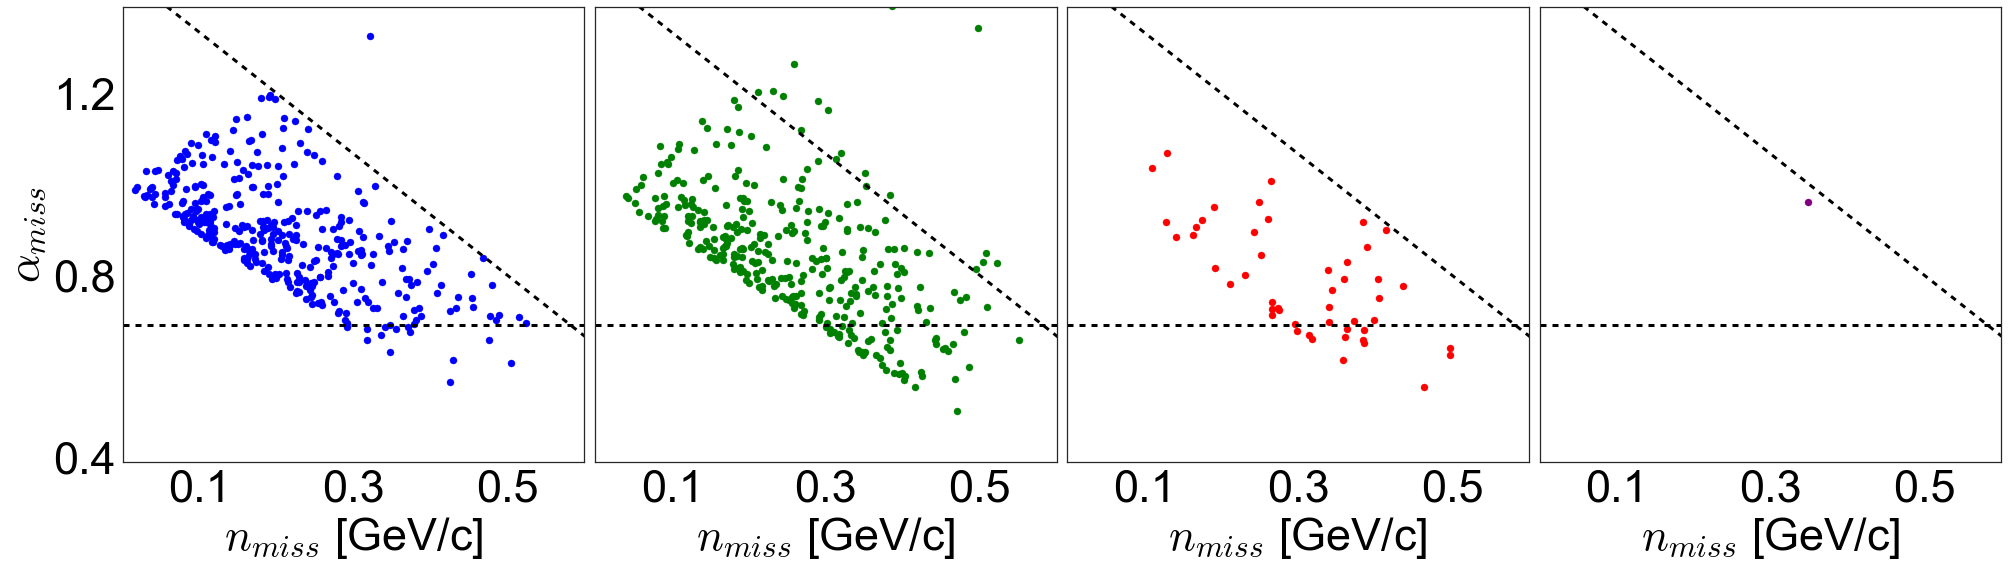

In [821]:
x_array_bottom,y_array_bottom=[0.,0.8],[0.7,0.7]
x_array_top,y_array_top=[0.02,0.77],[1.45,0.45]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,2,40),np.linspace(-0.01,2.5,40))
x_label,y_label='$n_{miss}$ [GeV/c]','$\\alpha_{miss}$'
reduced_this_cut,frac=[],[]
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    plt.plot(x_array_bottom,y_array_bottom,'--',color='black',linewidth=3)
    plt.plot(x_array_top,y_array_top,'--',color='black',linewidth=3)
    ax.scatter(sample['reco_CC1p_n_miss_fromE'], sample['reco_CC1p_alpha_miss_fromE'],color=color,s=50)
    ax.set_xlim(0.0,0.6);ax.set_ylim(0.4,1.4);

    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_ticks([0.1,0.3,.5]);ax.yaxis.set_ticks([0.4,0.8,1.2]);
    if i==0:
        slope_bottom,intercept_bottom = find_a_straight_line(x_array_bottom,y_array_bottom)
        print "reduced=reduced[reduced['reco_CC1p_alpha_miss_fromE']>%f*reduced['reco_CC1p_n_miss_fromE']+(%f)]"%(slope_bottom,intercept_bottom)
        slope_top,intercept_top = find_a_straight_line(x_array_top,y_array_top)
        print "reduced=reduced[reduced['reco_CC1p_alpha_miss_fromE']<%f*reduced['reco_CC1p_n_miss_fromE']+(%f)]"%(slope_top,intercept_top)
    red = sample    
    red = red[red['reco_CC1p_alpha_miss_fromE']>slope_bottom*red['reco_CC1p_n_miss_fromE']+intercept_bottom]
    red = red[red['reco_CC1p_alpha_miss_fromE']<slope_top*red['reco_CC1p_n_miss_fromE']+intercept_top]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
plt.tight_layout()
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'       

374 in sample 0 , 100  %
347 in sample 1 , 100  %
48 in sample 2 , 100  %
1 in sample 3 , 100  %
efficiency: 100.0 %
purity: 48.6 %


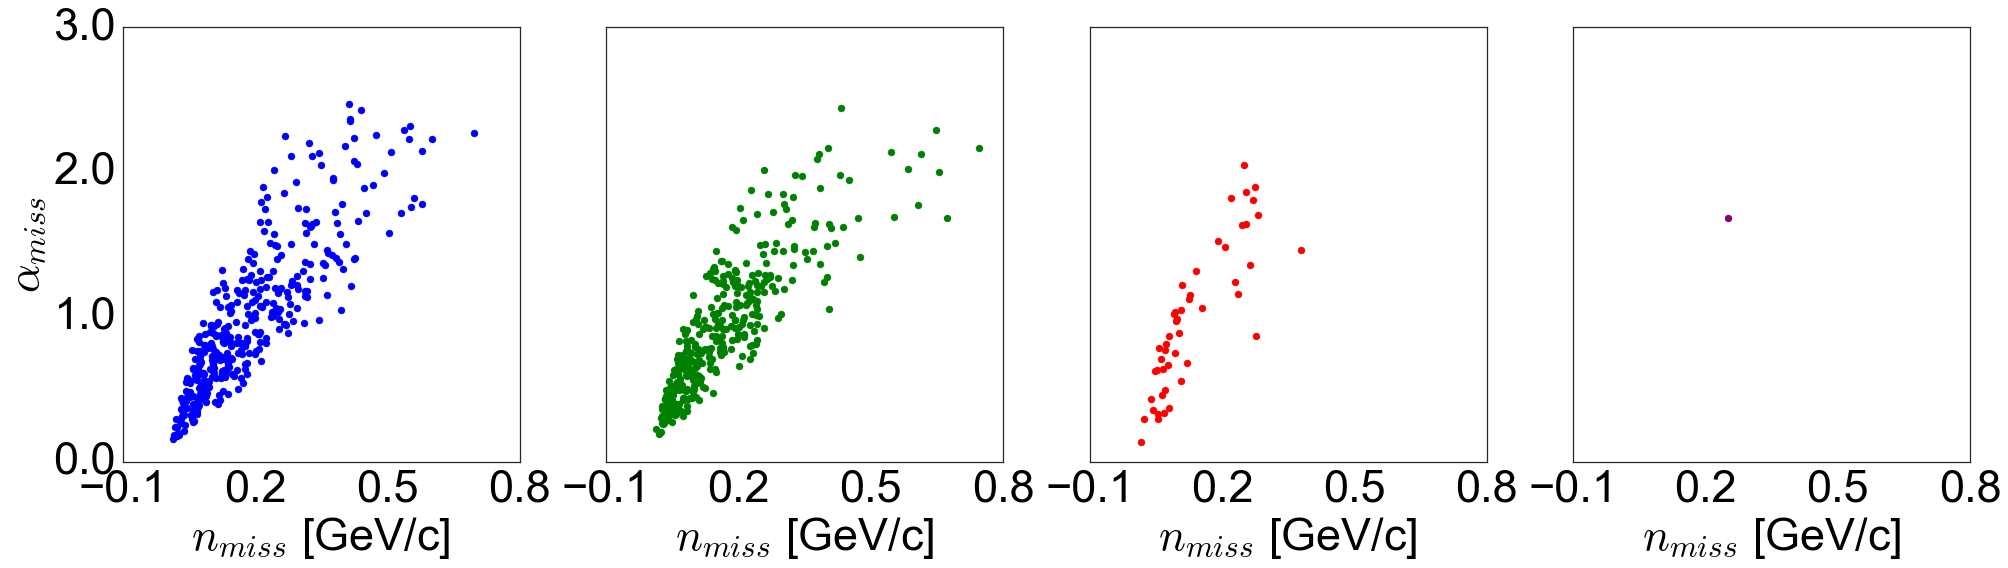

In [15]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,2,40),np.linspace(-0.01,2.5,40))
x_label,y_label='$n_{miss}$ [GeV/c]','$\\alpha_{miss}$'
reduced_this_cut,frac=[],[]
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(sample['reco_CC1p_Xb_fromE']*sample['reco_CC1p_y_fromE'], sample['reco_CC1p_Pmu_theta'],color=color,s=50)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
    ax.set_xlim(-.1,0.8);ax.set_ylim(0.,3);
#     ax.xaxis.set_ticks([0.1,0.3,.5]);ax.yaxis.set_ticks([0.4,0.8,1.2]);
    red = sample; f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
plt.tight_layout()
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'       